In [9]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [10]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [11]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


In [12]:
df_checks_with_cat

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
15963717,926946EB-0EE1-EC11-9064-005056A7A8DF,12618,37800,1.0,2022-05-31,22,85.00,21,Напитки,Соки,0.0
15963718,BBFD7F55-10E1-EC11-9064-005056A7A8DF,16061,24000,1.0,2022-05-31,22,75.00,21,"Сладости, кондитерские изделия",Пряники,-1.0
15963719,61ACDF39-C8E0-EC11-9064-005056A7A8DF,16061,37800,1.0,2022-05-31,22,85.00,12,Напитки,Соки,-1.0
15963720,0787699D-B3E0-EC11-9064-005056A7A8DF,16061,62800,1.0,2022-05-31,22,390.91,10,Мясо. Птица. П/ф охл. Яйца,Говядина.Телятина.,-1.0


Выделяем молочную продукцию

In [15]:
df_checks_with_cat_sub = df_checks_with_cat.pivot_table(columns=['name_gr2'],index=['good_or_bad'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()
df_checks_with_cat_sub.set_index(df_checks_with_cat_sub['good_or_bad'],inplace=True)
del df_checks_with_cat_sub['good_or_bad']

In [16]:
df_checks_with_cat_sub2 =df_checks_with_cat_sub.copy()
df_checks_with_cat_sub2['summ'] = df_checks_with_cat_sub[list(df_checks_with_cat_sub.columns)].sum(axis=1)


In [17]:
df_checks_with_cat_sub2  = df_checks_with_cat_sub2.iloc[:, 0:-1].divide(df_checks_with_cat_sub2.iloc[:,-1], axis = 'rows').mul(1000)

In [ ]:
#df_checks_with_cat_sub2.transpose().plot(kind="barh",figsize=(10,250))

In [18]:
df_checks_with_cat_sub2.transpose().to_pickle("./Sales_subcat.pkl")
df_checks_with_cat_sub2.transpose().to_excel("Sales_subcat.xlsx")


In [19]:
lead_categories = ['Торты' , 'Творог классика' , 'Сыры полутвердые и твердые' , 'Сосиски.Сардельки.Колбаски' , 'Сметана' , 'Пиво' , 'Печенье, галеты, крекеры' , 'Пельмени.Манты' , 'П/ф рыбные' , 'П/ф из мяса' , 'Мороженое ТОПЫ' , 'Мороженое' , 'Молоко' , 'Масло' , 'Курица' , 'Колбаса вареная. Ветчина' , 'Кефир' , 'Зефир, безе, пастила' , 'Детское питьевое молочное питание' , 'Десерты выходного дня' , 'Десерты молочные' , 'Вареники' , 'Баранки, сушки, сухари']

In [48]:
df_checks_with_cat_lead_sub2 = df_checks_with_cat_sub2['BaseSum'][lead_categories]
df_checks_with_cat_lead_sub2


name_gr2,Торты,Творог классика,Сыры полутвердые и твердые,Сосиски.Сардельки.Колбаски,Сметана,Пиво,"Печенье, галеты, крекеры",Пельмени.Манты,П/ф рыбные,П/ф из мяса,Мороженое ТОПЫ,Мороженое,Молоко,Масло,Курица,Колбаса вареная. Ветчина,Кефир,"Зефир, безе, пастила",Детское питьевое молочное питание,Десерты выходного дня,Десерты молочные,Вареники,"Баранки, сушки, сухари"
good_or_bad,,,,,,,,,,,,,,,,,,,,,,,
-1.0,15.887989,23.981838,18.944308,5.723630,8.547450,8.962190,16.641453,10.129639,4.872848,7.626501,5.268355,9.849543,19.276659,8.358080,22.344205,6.393114,9.089628,5.955285,6.730318,2.818099,4.079946,4.589223,3.681743
0.0,15.865806,25.467072,19.143863,6.022511,9.317459,10.927654,16.800849,11.562447,4.964129,7.625530,6.022759,10.529298,21.962814,8.625709,22.780300,6.742722,10.173874,6.216309,7.370596,3.161172,4.067170,4.972028,3.947068
1.0,18.334887,29.041718,20.489309,6.743074,10.145072,12.164302,18.305780,14.230107,5.974406,8.568066,7.211466,11.738461,26.483971,9.996117,23.596363,7.849323,12.044931,7.361988,8.333434,3.606033,4.667137,5.852352,4.586958


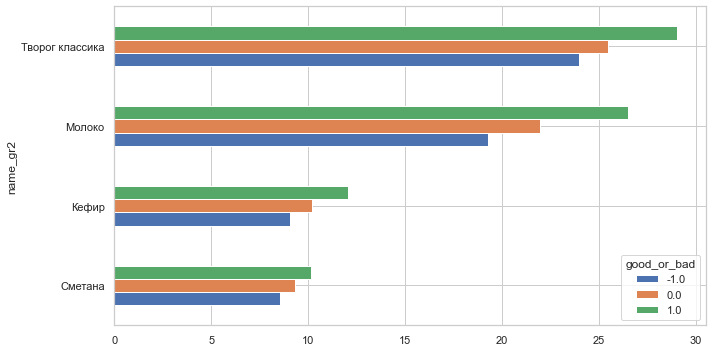

In [53]:
grap1 = df_checks_with_cat_lead_sub2[['Сметана','Кефир','Молоко','Творог классика']].transpose().plot(kind="barh",figsize=(10,5))
fig = grap1.get_figure()
fig.tight_layout()
fig.savefig('figure.jpeg')

In [23]:
#выделяем хорошие магазины 
good_shops = df_shops['id_tt'].loc[df_shops['good_or_bad'] == 1].values.tolist()

In [24]:
good_shops_1 = good_shops[0:6]
good_shops_2 = good_shops[6:12]
good_shops_3 = good_shops[12:17]
good_shops_4 = good_shops[17:22]

In [25]:
df_checks_1_lead = df_checks_with_cat.loc[ (df_checks_with_cat['id_tt_cl'].isin(good_shops_1))]
df_checks_2_lead = df_checks_with_cat.loc[ (df_checks_with_cat['id_tt_cl'].isin(good_shops_2))]
df_checks_3_lead = df_checks_with_cat.loc[ (df_checks_with_cat['id_tt_cl'].isin(good_shops_3))]
df_checks_4_lead = df_checks_with_cat.loc[ (df_checks_with_cat['id_tt_cl'].isin(good_shops_4))]



In [26]:
def compare_with_avg( df_checks_1_lead , df_checks_with_cat_lead_sub2 ):
    #create pivot table with index
    df_lead_checks_1 = df_checks_1_lead.pivot_table(columns=['name_gr2'],index=['id_tt_cl'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()
    df_lead_checks_1.set_index(df_lead_checks_1['id_tt_cl'],inplace=True)
    del df_lead_checks_1['id_tt_cl']
    #calculate normalisarion sales value in table 
    df_lead_checks_1_2 =df_lead_checks_1.copy()
    df_lead_checks_1_2['summ'] = df_lead_checks_1_2[list(df_lead_checks_1_2.columns)].sum(axis=1)
    df_lead_checks_1_2  = df_lead_checks_1_2.iloc[:, 0:-1].divide(df_lead_checks_1_2.iloc[:,-1], axis = 'rows').mul(1000)
    #clean dataframe format
    df_lead_checks_1_2_t = df_lead_checks_1_2['BaseSum']
    #select only leading categories
    df_lead_checks_1_2_t = df_lead_checks_1_2_t[lead_categories]
    df_lead_checks_1_2_t = df_lead_checks_1_2_t.transpose()
    df_checks_with_cat_lead_sub2_t = df_checks_with_cat_lead_sub2.transpose()
    #Calculate average
    df_checks_with_cat_lead_sub2_t['average'] = (df_checks_with_cat_lead_sub2_t[-1]+df_checks_with_cat_lead_sub2_t[0])/2
    del df_checks_with_cat_lead_sub2_t[0]
    del df_checks_with_cat_lead_sub2_t[-1]
    del df_checks_with_cat_lead_sub2_t[1]

    #Merge dataframe with average
    df_lead_checks_1_2_tm = df_lead_checks_1_2_t.merge(df_checks_with_cat_lead_sub2_t, left_index=True, right_index=True)

    #Subscteact shop sales from avg
    for column in df_lead_checks_1_2_tm.loc[:, df_lead_checks_1_2_tm.columns != 'average']:
        df_lead_checks_1_2_tm[column] = df_lead_checks_1_2_tm[column] - df_lead_checks_1_2_tm['average']
    
    return df_lead_checks_1_2_tm

In [36]:
def get_sales(id_shop , df_checks_with_cat_lead_sub2):
    df_checks_x_lead = df_checks_with_cat.loc[ (df_checks_with_cat['id_tt_cl'] == id_shop )]
    df_lead_checks_x_res = compare_with_avg( df_checks_x_lead , df_checks_with_cat_lead_sub2 )
    df_lead_checks_x_res.plot(kind="barh",figsize=(10,10))
    #return df_lead_checks_x_res

name_gr2,Торты,"Печенье, галеты, крекеры",Молоко,Творог классика
good_or_bad,,,,
-1.0,15.887989,16.641453,19.276659,23.981838
0.0,15.865806,16.800849,21.962814,25.467072
1.0,18.334887,18.305780,26.483971,29.041718


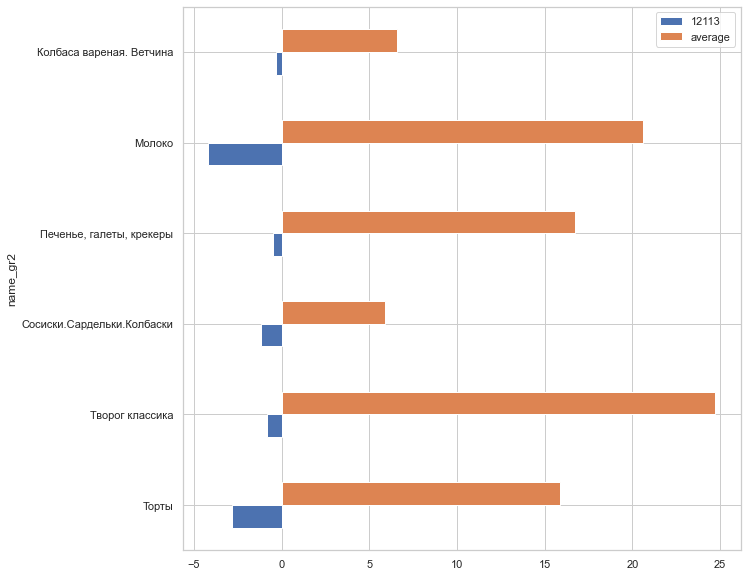

In [57]:
get_sales(12113 , df_checks_with_cat_lead_sub2[['Торты','Печенье, галеты, крекеры','Молоко','Творог классика','Колбаса вареная. Ветчина','Сосиски.Сардельки.Колбаски']])
df_checks_with_cat_lead_sub2[['Торты','Печенье, галеты, крекеры','Молоко','Творог классика']]

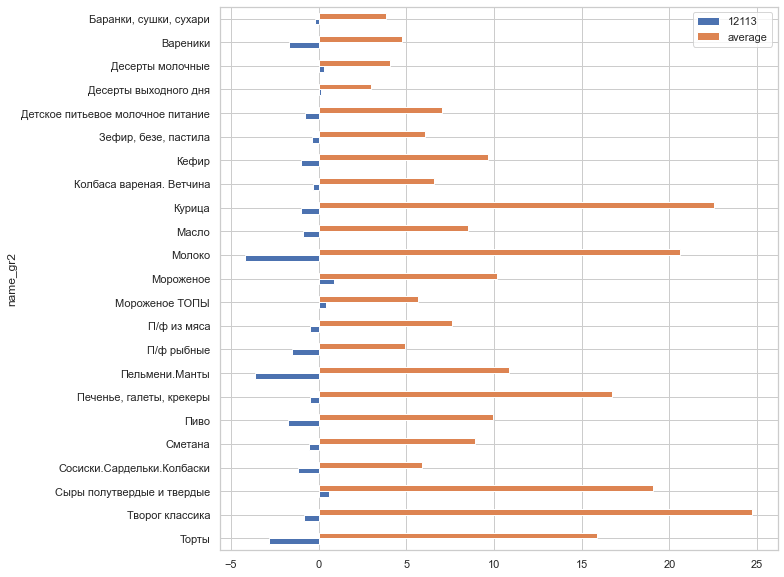

In [54]:
get_sales(12113 , df_checks_with_cat_lead_sub2)

In [31]:
df_checks_with_cat_lead_sub2

name_gr2,Торты,Творог классика,Сыры полутвердые и твердые,Сосиски.Сардельки.Колбаски,Сметана,Пиво,"Печенье, галеты, крекеры",Пельмени.Манты,П/ф рыбные,П/ф из мяса,Мороженое ТОПЫ,Мороженое,Молоко,Масло,Курица,Колбаса вареная. Ветчина,Кефир,"Зефир, безе, пастила",Детское питьевое молочное питание,Десерты выходного дня,Десерты молочные,Вареники,"Баранки, сушки, сухари"
good_or_bad,,,,,,,,,,,,,,,,,,,,,,,
-1.0,15.887989,23.981838,18.944308,5.723630,8.547450,8.962190,16.641453,10.129639,4.872848,7.626501,5.268355,9.849543,19.276659,8.358080,22.344205,6.393114,9.089628,5.955285,6.730318,2.818099,4.079946,4.589223,3.681743
0.0,15.865806,25.467072,19.143863,6.022511,9.317459,10.927654,16.800849,11.562447,4.964129,7.625530,6.022759,10.529298,21.962814,8.625709,22.780300,6.742722,10.173874,6.216309,7.370596,3.161172,4.067170,4.972028,3.947068
1.0,18.334887,29.041718,20.489309,6.743074,10.145072,12.164302,18.305780,14.230107,5.974406,8.568066,7.211466,11.738461,26.483971,9.996117,23.596363,7.849323,12.044931,7.361988,8.333434,3.606033,4.667137,5.852352,4.586958


In [177]:
df_lead_checks_1_res = compare_with_avg( df_checks_1_lead , df_checks_with_cat_lead_sub2 )
df_lead_checks_2_res = compare_with_avg( df_checks_2_lead , df_checks_with_cat_lead_sub2 )
df_lead_checks_3_res = compare_with_avg( df_checks_3_lead , df_checks_with_cat_lead_sub2 )
df_lead_checks_4_res = compare_with_avg( df_checks_4_lead , df_checks_with_cat_lead_sub2 )



<AxesSubplot:ylabel='name_gr2'>

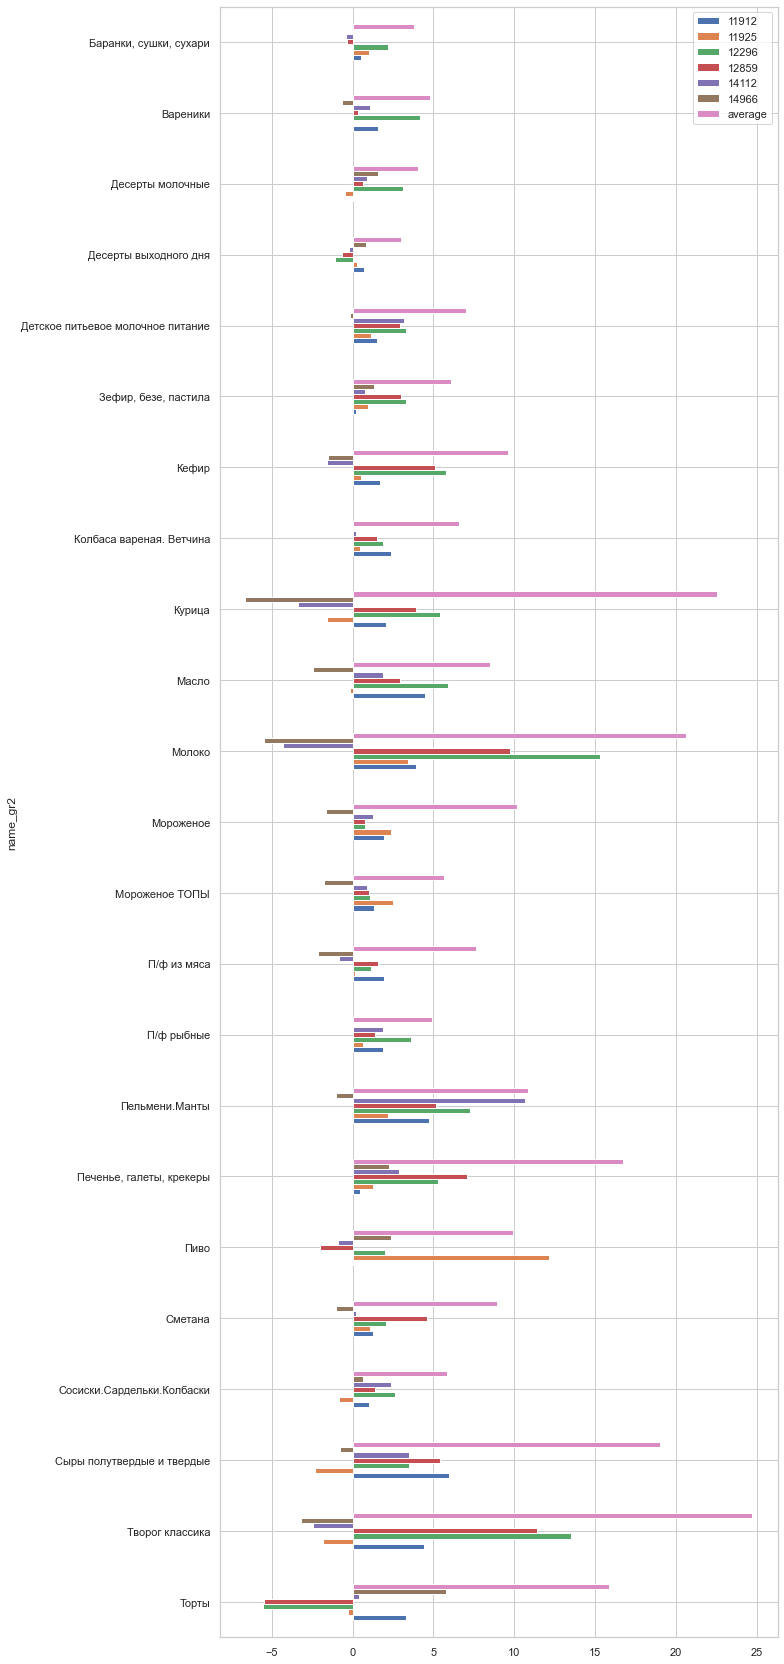

In [193]:
df_lead_checks_1_res.plot(kind="barh",figsize=(10,30))